 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_csv = Path("data/whale_returns.csv")
whale_df=pd.read_csv(whale_returns_csv, parse_dates=True)
whale_df.set_index('Date', inplace=True)
whale_df.rename(columns={'SOROS FUND MANAGEMENT LLC':'Soros Fund',
                'PAULSON & CO.INC. ':'Paulson & Co','TIGER GLOBAL MANAGEMENT LLC':'Tiger Global',
                'BERKSHIRE HATHAWAY INC':'BRK'}, inplace=True)
whale_df.head()

,Soros Fund,Paulson & Co,Tiger Global,BRK
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isnull().sum(axis=0)

Soros Fund      1
Paulson & Co    1
Tiger Global    1
BRK             1
dtype: int64

In [5]:
# Drop nulls
whale_df1=whale_df.dropna()
whale_df1.isnull().sum(axis=0)

Soros Fund      0
Paulson & Co    0
Tiger Global    0
BRK             0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("data/algo_returns.csv")
algo_df=pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_df.isnull().sum(axis=0)

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df1=algo_df.dropna()
algo_df1.isnull().sum(axis=0)

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("data/sp500_history.csv")
sp500_df=pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close']=sp500_df['Close'].astype('float')
sp500_df.dtypes

Close    float64
dtype: object

In [23]:
# Calculate Daily Returns
sp500_df['SP500 returns']=sp500_df['Close'].pct_change()
sp500_df.head()

,Close,SP500 returns
Date,,
2019-04-23,2933.68,NaN
2019-04-22,2907.97,-0.008764
2019-04-18,2905.03,-0.001011
2019-04-17,2900.45,-0.001577
2019-04-16,2907.06,0.002279


In [24]:
# Drop nulls
sp500_df1=sp500_df.dropna()
sp500_df1.isnull().sum(axis=0)

Close            0
SP500 returns    0
dtype: int64

In [25]:
# Rename Column
sp500_df1=sp500_df1.drop(['Close'], axis=1)

,SP500 returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [26]:
# Concatenate all DataFrames into a single DataFrame
merge_df=whale_df1.join(algo_df1)
merge_df1=merge_df.join(sp500_df1)
merge_df1.dropna(inplace=True)
merge_df1.head()

,Soros Fund,Paulson & Co,Tiger Global,BRK,Algo 1,Algo 2,SP500 returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

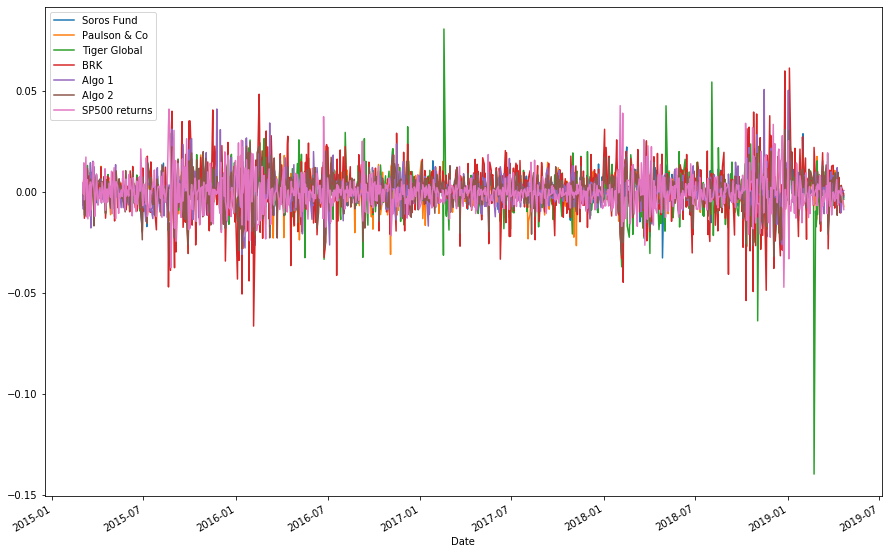

In [27]:
# Plot daily returns
merge_df1.plot(figsize=(15,10))

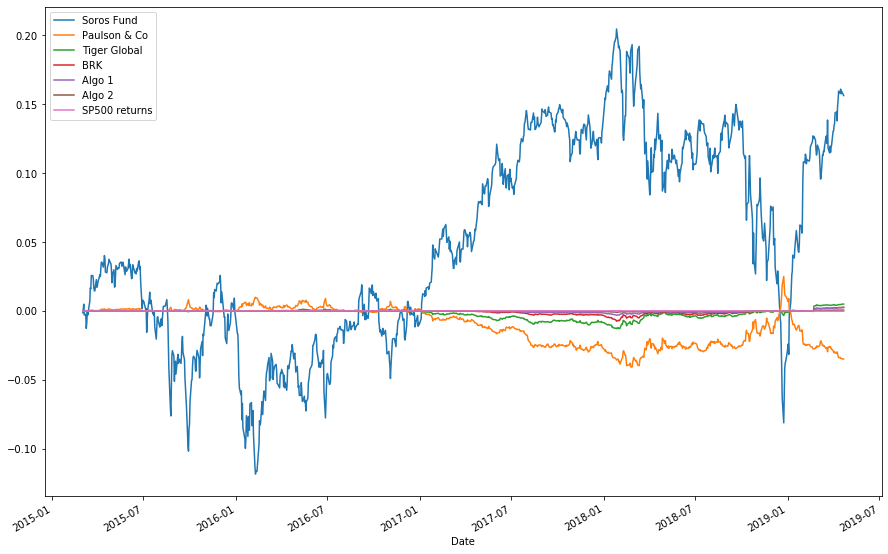

In [28]:
# Plot cumulative returns
merge_cum_df=((merge_df1+1).cumprod()-1)
merge_cum_df.cumprod(axis=1).plot(figsize=(15,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

In [17]:
# Box plot to visually show risk
boxplot = merge_df1.boxplot(figsize=(15,10))

In [31]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
'''if we look at each portfolio an independent asset and 
do not worry about the assets underlying the portfolio'''
merge_std= merge_df1.std()

'''if we look at whale_returns and algo_returns as portfolios of portfolios and
run the calculation taking weight and covariance into account to calculate 
an annualized portfolio standar deviation'''
weights_whale = np.asarray([0.25,0.25,0.25,0.25])
cov_matrix_whale = merge_df1.iloc[:,0:4].cov()
merge_std['whale_port']= round(np.sqrt(np.dot(weights_whale.T,np.dot(cov_matrix_whale, weights_whale))),6)


weights_algo = np.asarray([0.5,0.5])
cov_matrix_algo = merge_df1.iloc[:,4:6].cov()
merge_std['algo_port'] = round(np.sqrt(np.dot(weights_algo.T,np.dot(cov_matrix_algo, weights_algo))) ,6)

merge_std


Soros Fund       0.007896
Paulson & Co     0.007026
Tiger Global     0.010897
BRK              0.012919
Algo 1           0.007623
Algo 2           0.008341
SP500 returns    0.008587
whale_port       0.007946
algo_port        0.006409
dtype: float64

In [32]:
# Determine which portfolios are riskier than the S&P 500
riskier_std=merge_std.loc[merge_std>merge_std['SP500 returns']]
riskier_std

Tiger Global    0.010897
BRK             0.012919
dtype: float64

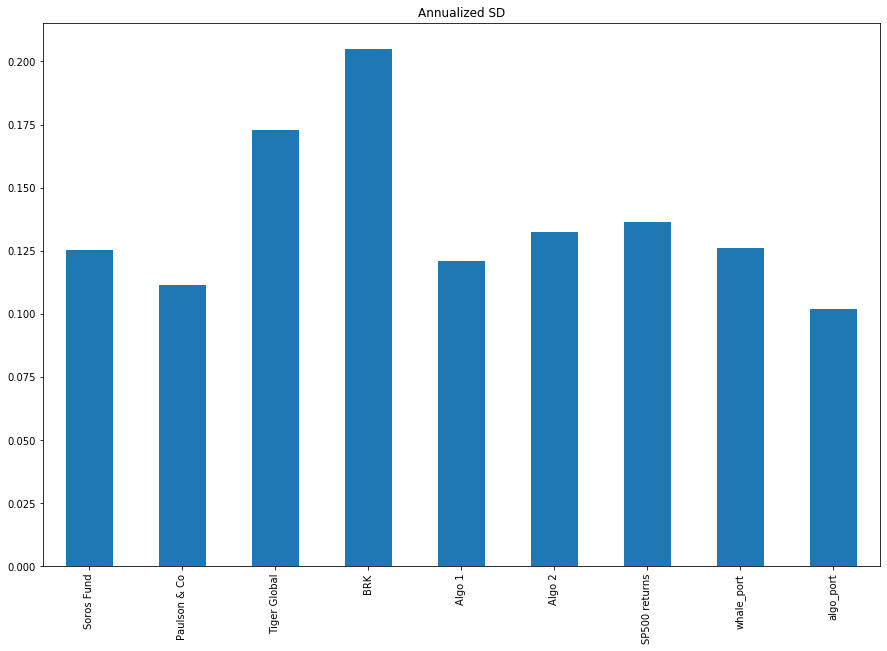

In [36]:
# Calculate the annualized standard deviation (252 trading days)
merge_annual_std=(merge_std* np.sqrt(252))
riskier_annual_std=merge_annual_std.loc[merge_annual_std>merge_annual_std['SP500 returns']]
riskier_annual_std
merge_annual_std.plot(kind="bar",figsize=(15,10), title="Annualized SD")

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

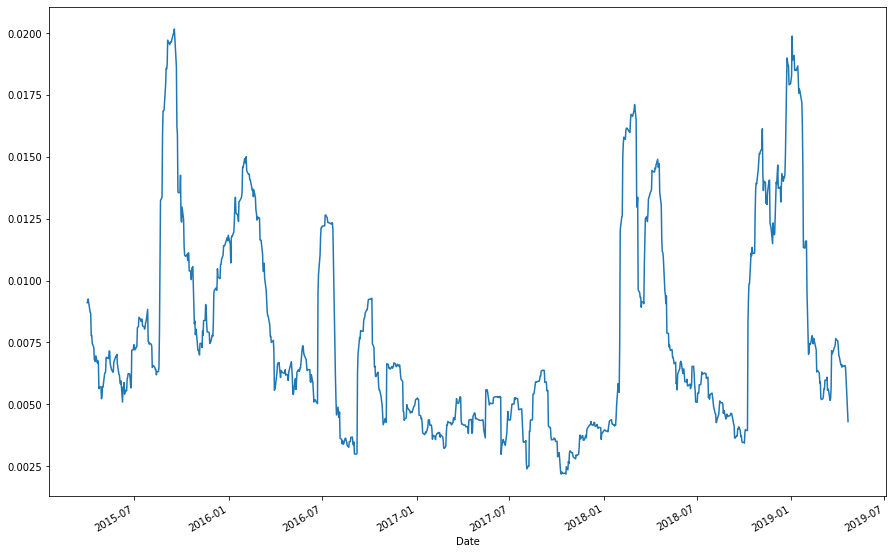

In [37]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
merge_df1['SP500 returns'].rolling(window=21).std().plot(figsize=(15,10))

In [38]:
# Correlation
merge_df1.corr()


,Soros Fund,Paulson & Co,Tiger Global,BRK,Algo 1,Algo 2,SP500 returns
Soros Fund,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
Paulson & Co,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
Tiger Global,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BRK,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500 returns,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [41]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
#beta for a stock is =cov(Ri,Rb)/var(Rb) or cor(Ri,Rb)*(sd(Ri)/sd(Rb))
beta=[]
cols=[]
merged_df1_CM=merge_df1.cov()
for col in merged_df1_CM.columns:   
    cols.append(col)
    beta.append(round((merged_df1_CM.loc[col,'SP500 returns'])/(merge_df1['SP500 returns'].var()),4))
betas_df=pd.DataFrame(beta, index=cols, columns=['Beta'])
betas_df

,Beta
Soros Fund,0.0005
Paulson & Co,0.0111
Tiger Global,-0.0019
BRK,-0.0208
Algo 1,-0.0301
Algo 2,-0.0021
SP500 returns,1.0000


### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

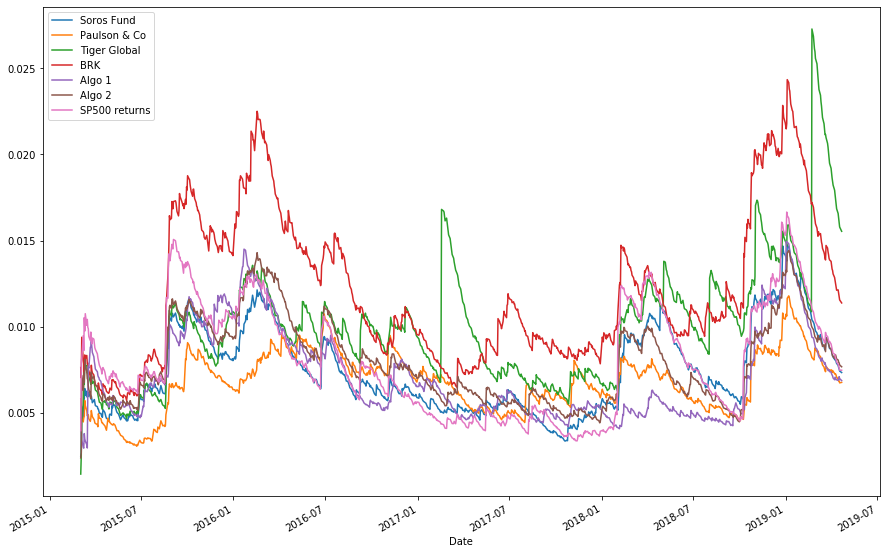

In [43]:
merge_df1.ewm(halflife=21).std().plot(figsize=(15,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [46]:
# Annualzied Sharpe Ratios
#SR=(annualied return-Risk free rate)/(annualized standard deviation), current RFR=.62%
sharpe_ratios = (merge_df1.mean() * 252-.0062) / (merge_df1.std() * np.sqrt(252))
sharpe_ratios

#since I have the betas, here is the Treynor ratios
#TR=(annualied return-Risk free rate)/(portfolio beta), current RFR=.62%
annualized_return = (merge_df1.mean() * 252-.0062)
treynor_ratios=annualized_return.div(beta,axis='index')

sharpe_ratios

Soros Fund       0.293431
Paulson & Co    -0.547014
Tiger Global    -0.166027
BRK              0.576510
Algo 1           1.318352
Algo 2           0.437511
SP500 returns   -0.564066
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

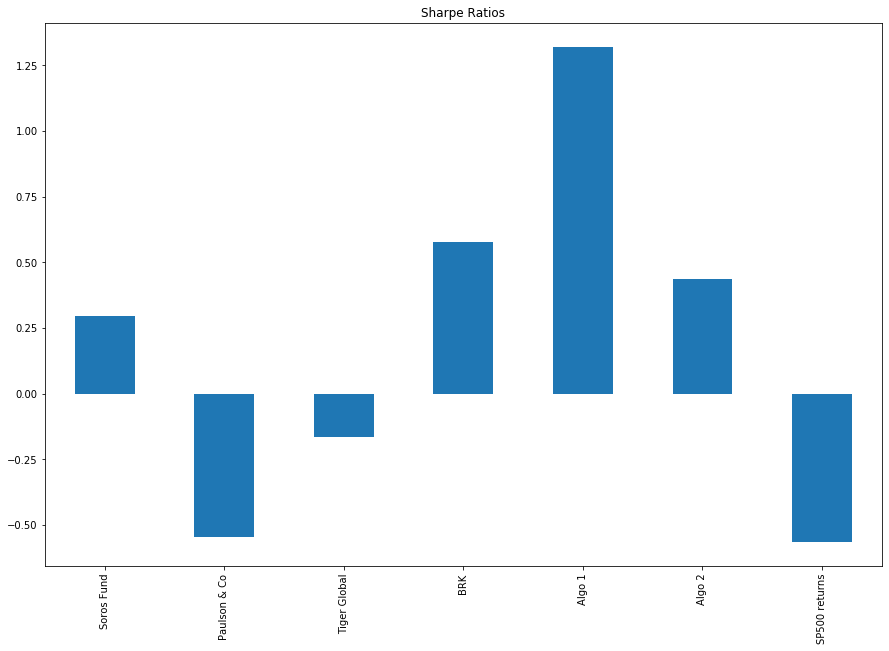

In [47]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar",figsize=(15,10), title="Sharpe Ratios")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [67]:
# Read the first stock
#I am using a list of 10 biotechs currently developing covid-19 drugs, mostly vaccines
Tickers=['MRNA', 'GILD', 'REGN', 'DVAX', 'CYDY','JNJ', 'INO', 'VXRT', 'TBIO', 'NVAX']
i=0
for x in Tickers:
    yahoo_financials = YahooFinancials(x)
    data = yahoo_financials.get_historical_price_data(start_date='2016-01-01', 
                                                   end_date='2020-04-06',time_interval='daily')
    if i ==0:
        my_port_df= pd.DataFrame(data[x]['prices'])
        my_port_df.drop(columns=['date','high','low', 'open','close', 'volume'], inplace=True)
        my_port_df.rename(columns={'formatted_date':"Date"}, inplace=True)
        my_port_df['Date']=pd.to_datetime(my_port_df['Date'])
        my_port_df.set_index('Date', inplace=True)
        my_port_df.rename(columns={'adjclose':'MRNA'}, inplace=True)
        i+=1
    else:
        df= pd.DataFrame(data[x]['prices'])
        df['formatted_date']=pd.to_datetime(df['formatted_date'])
        df.drop(columns=['date','high','low', 'open','close', 'volume'], inplace=True)
        df.rename(columns={'formatted_date':"Date",'adjclose':x}, inplace=True)
        df.set_index('Date', inplace=True)
       
        my_port_df=pd.concat([my_port_df,df], axis='columns', join='inner')
        

my_port_df.head()

,MRNA,GILD,REGN,DVAX,CYDY,JNJ,INO,VXRT,TBIO,NVAX
Date,,,,,,,,,,
2018-12-07,18.600000,64.476410,372.829987,10.54,0.58,140.546616,5.16,3.00,8.53,41.000000
2018-12-10,18.799999,63.852001,377.589996,10.87,0.57,140.382324,5.19,2.76,8.51,42.799999
2018-12-11,18.010000,64.069588,375.720001,10.82,0.54,141.580704,5.19,2.70,9.06,44.599998
2018-12-12,18.680000,64.466957,377.959991,11.64,0.54,142.160538,5.31,2.75,9.00,49.599998
2018-12-13,18.760000,64.257065,378.510010,10.49,0.52,142.875671,5.10,2.68,8.73,46.000000


In [28]:
# Read the second stock
# YOUR CODE HERE

In [29]:
# Read the third stock
# YOUR CODE HERE

In [30]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

In [31]:
# Reset the index
# YOUR CODE HERE

In [69]:
# Drop Nulls
my_port_df.isnull().sum(axis=0)
my_port_df1=my_port_df.dropna()
my_port_df1.isnull().sum(axis=0)

MRNA    0
GILD    0
REGN    0
DVAX    0
CYDY    0
JNJ     0
INO     0
VXRT    0
TBIO    0
NVAX    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [102]:
# Calculate weighted portfolio returns
weights = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]
my_port_ret=my_port_df1.pct_change(axis=0)
my_port_ret.dropna(inplace=True)
my_port_ret['portfolio return']=my_port_ret.mul(weights,axis=1).sum(axis=1)
my_port_ret.head()


,MRNA,GILD,REGN,DVAX,CYDY,JNJ,INO,VXRT,TBIO,NVAX,portfolio return
Date,,,,,,,,,,,
2018-12-10,0.010753,-0.009684,0.012767,0.031309,-0.017241,-0.001169,0.005814,-0.080000,-0.002345,0.043902,-0.000589
2018-12-11,-0.042021,0.003408,-0.004952,-0.004600,-0.052632,0.008537,0.000000,-0.021739,0.064630,0.042056,-0.000731
2018-12-12,0.037202,0.006202,0.005962,0.075786,0.000000,0.004095,0.023121,0.018519,-0.006623,0.112108,0.027637
2018-12-13,0.004283,-0.003256,0.001455,-0.098797,-0.037037,0.005030,-0.039548,-0.025455,-0.030000,-0.072581,-0.029591
2018-12-14,-0.023454,-0.026429,0.007028,0.012393,-0.019231,-0.100379,-0.047059,-0.067164,-0.061856,0.047826,-0.027832


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [103]:
merge_df2=pd.concat([merge_df1,my_port_ret], axis=1, join='inner')
merge_df2.head()

,Soros Fund,Paulson & Co,Tiger Global,BRK,Algo 1,Algo 2,SP500 returns,MRNA,GILD,REGN,DVAX,CYDY,JNJ,INO,VXRT,TBIO,NVAX,portfolio return
Date,,,,,,,,,,,,,,,,,,
2018-12-10,-0.009854,-0.004736,-0.007709,-0.002190,-0.016156,-0.004270,0.000356,0.010753,-0.009684,0.012767,0.031309,-0.017241,-0.001169,0.005814,-0.080000,-0.002345,0.043902,-0.000589
2018-12-11,-0.001686,-0.003164,0.000611,0.001262,-0.008391,-0.002542,-0.005390,-0.042021,0.003408,-0.004952,-0.004600,-0.052632,0.008537,0.000000,-0.021739,0.064630,0.042056,-0.000731
2018-12-12,0.009128,0.008147,0.002798,0.017475,0.002048,0.006321,0.000200,0.037202,0.006202,0.005962,0.075786,0.000000,0.004095,0.023121,0.018519,-0.006623,0.112108,0.027637
2018-12-13,-0.006231,-0.005056,0.000476,-0.004340,-0.012556,-0.010408,0.019458,0.004283,-0.003256,0.001455,-0.098797,-0.037037,0.005030,-0.039548,-0.025455,-0.030000,-0.072581,-0.029591
2018-12-14,-0.007269,-0.012273,-0.020367,-0.015391,-0.007552,-0.013574,0.021214,-0.023454,-0.026429,0.007028,0.012393,-0.019231,-0.100379,-0.047059,-0.067164,-0.061856,0.047826,-0.027832


In [104]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

merge_df2.dropna(inplace=True)
merge_df2.isnull().sum(axis=0)

Soros Fund          0
Paulson & Co        0
Tiger Global        0
BRK                 0
Algo 1              0
Algo 2              0
SP500 returns       0
MRNA                0
GILD                0
REGN                0
DVAX                0
CYDY                0
JNJ                 0
INO                 0
VXRT                0
TBIO                0
NVAX                0
portfolio return    0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [106]:
# Risk
merge_mp_std= merge_df2.iloc[:,0:17].std() * np.sqrt(252)

'''the portfolio standard div =ΣΣw(i)w(j)σ(i)σ(j)ρ(i,j) so using the unweighted returns for my portfolio
to avoid double counting the weighting'''
weights_my_port = np.asarray([.1,.1,.1,.1,.1,.1,.1,.1,.1,.1])
cov_matrix_my_port = merge_df2.iloc[:,7:17].cov()
merge_mp_std['portfolio return']=round(((np.sqrt(np.dot(weights_my_port.T,np.dot
                                        (cov_matrix_my_port, weights_my_port)))
                                       * np.sqrt(252))),2)
my_riskier_std=merge_mp_std.loc[merge_mp_std>merge_mp_std['SP500 returns']]
my_riskier_std

Tiger Global        0.283241
BRK                 0.237784
MRNA                0.743973
GILD                0.239289
REGN                0.323936
DVAX                0.577642
CYDY                0.543059
JNJ                 0.234281
INO                 0.609689
VXRT                1.335745
TBIO                1.143525
NVAX                1.340282
portfolio return    0.330000
dtype: float64

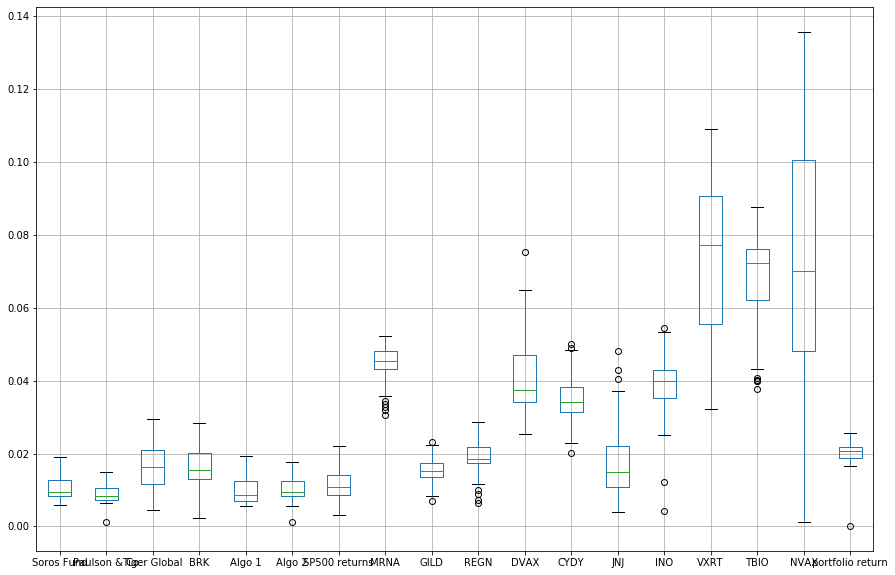

In [107]:
# Rolling
merge_df2.ewm(halflife=21).std().boxplot(figsize=(15,10))

In [112]:
# Beta
'''the portfolio beta is the weighted of all the individual asset beta.'''
pb=0
beta_my_port=[]
cols_my_port=[]
merged_df2_CM=merge_df2.cov()
weight=[.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]
for col in merged_df2_CM.columns:   
    cols_my_port.append(col)
    if col!='portfolio return':
        beta_my_port.append(round(merged_df2_CM.loc[col,'SP500 returns']/merge_df2['SP500 returns'].var(),4))
    else: 
        for x in range(7,17):
            for y in range(10):
                pb+=beta_my_port[x]*weight[y]
beta_my_port.append(round((pb),4))
betas_my_port_df=pd.DataFrame(beta_my_port, index=cols_my_port, columns=['Beta'])
betas_my_port_df

,Beta
Soros Fund,-0.0664
Paulson & Co,-0.1034
Tiger Global,-0.0303
BRK,-0.0761
Algo 1,-0.1574
Algo 2,-0.1233
SP500 returns,1.0000
MRNA,-0.3875
GILD,-0.1281
REGN,-0.3081


In [152]:
# Annualzied Sharpe Ratios
annualized_RFR_return = (merge_df2.mean() * 252-.0062)
my_port_sharpe=round(annualized_RFR_return.div(merge_mp_std, axis='index'),4)
my_port_sharpe

#since I have the betas, here is the Treynor ratios
treynor_my_port=round(annualized_RFR_return.div(beta_my_port,axis=0),4)

my_port_sharpe

Soros Fund          -4.8426
Paulson & Co        -0.6203
Tiger Global        12.2398
BRK                 -7.2506
Algo 1              -1.4300
Algo 2              -2.4265
SP500 returns       -0.2869
MRNA                -2.3936
GILD                 1.5272
REGN                 0.8393
DVAX                 1.7440
CYDY                 1.0138
JNJ                 -4.0414
INO                  1.5082
VXRT                -6.6680
TBIO                 1.4645
NVAX               -97.6641
portfolio return     0.4513
dtype: float64

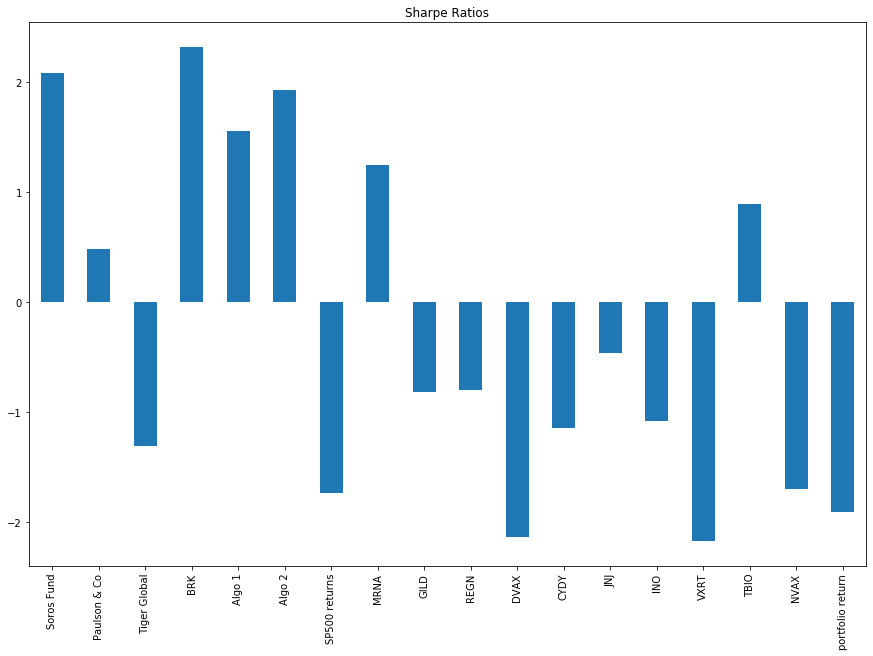

In [140]:
# Visualize the sharpe ratios as a bar plot
my_port_sharpe.plot(kind="bar",figsize=(15,10), title="Sharpe Ratios")

## Include correlation analysis to determine which stocks (if any) are correlated

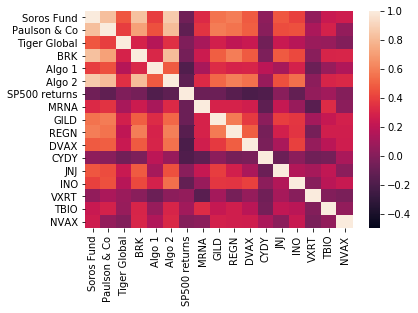

In [141]:
corr=merge_df3.corr()
sns.heatmap(corr, vmin=-0.5, vmax=1.)

In [146]:
betas_my_port_df.shape


(18, 1)